## Variable distributions and their effects on Models

Reference 
[https://www.statisticssolutions.com/homoscedasticity/]

### Linear Regression Assumptions

- Linear relationship with the outcome Y
- Homoscedasticity
- Normality
- No Multicollinearity 

## Linear Assumption

- The X variable is linearly related to the dataset 
- Pearson correlation coefficient can determine the linearity magnitude  between variables 

## Normality Assumption

- The variable X follows a normal or gaussian distribution

## Homoscedasticity Assumption

- Homogeneity of variance

- Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables


### Unaffected models

- Neural Networks
- Support Vector Machines
- Trees



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
sns.set()
import pandas as pd



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.datasets import load_boston
dataset = load_boston()

In [3]:
dataset.data.shape

(506, 13)

In [4]:
dataset.target.shape

(506,)

## Correlation Matrix

Making a correlation matrix

In [5]:
X = dataset.data
y = dataset.target

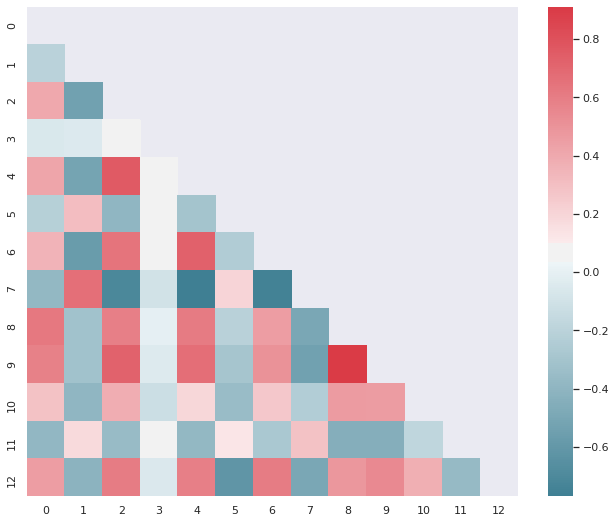

In [6]:
data = pd.DataFrame(X)
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap)

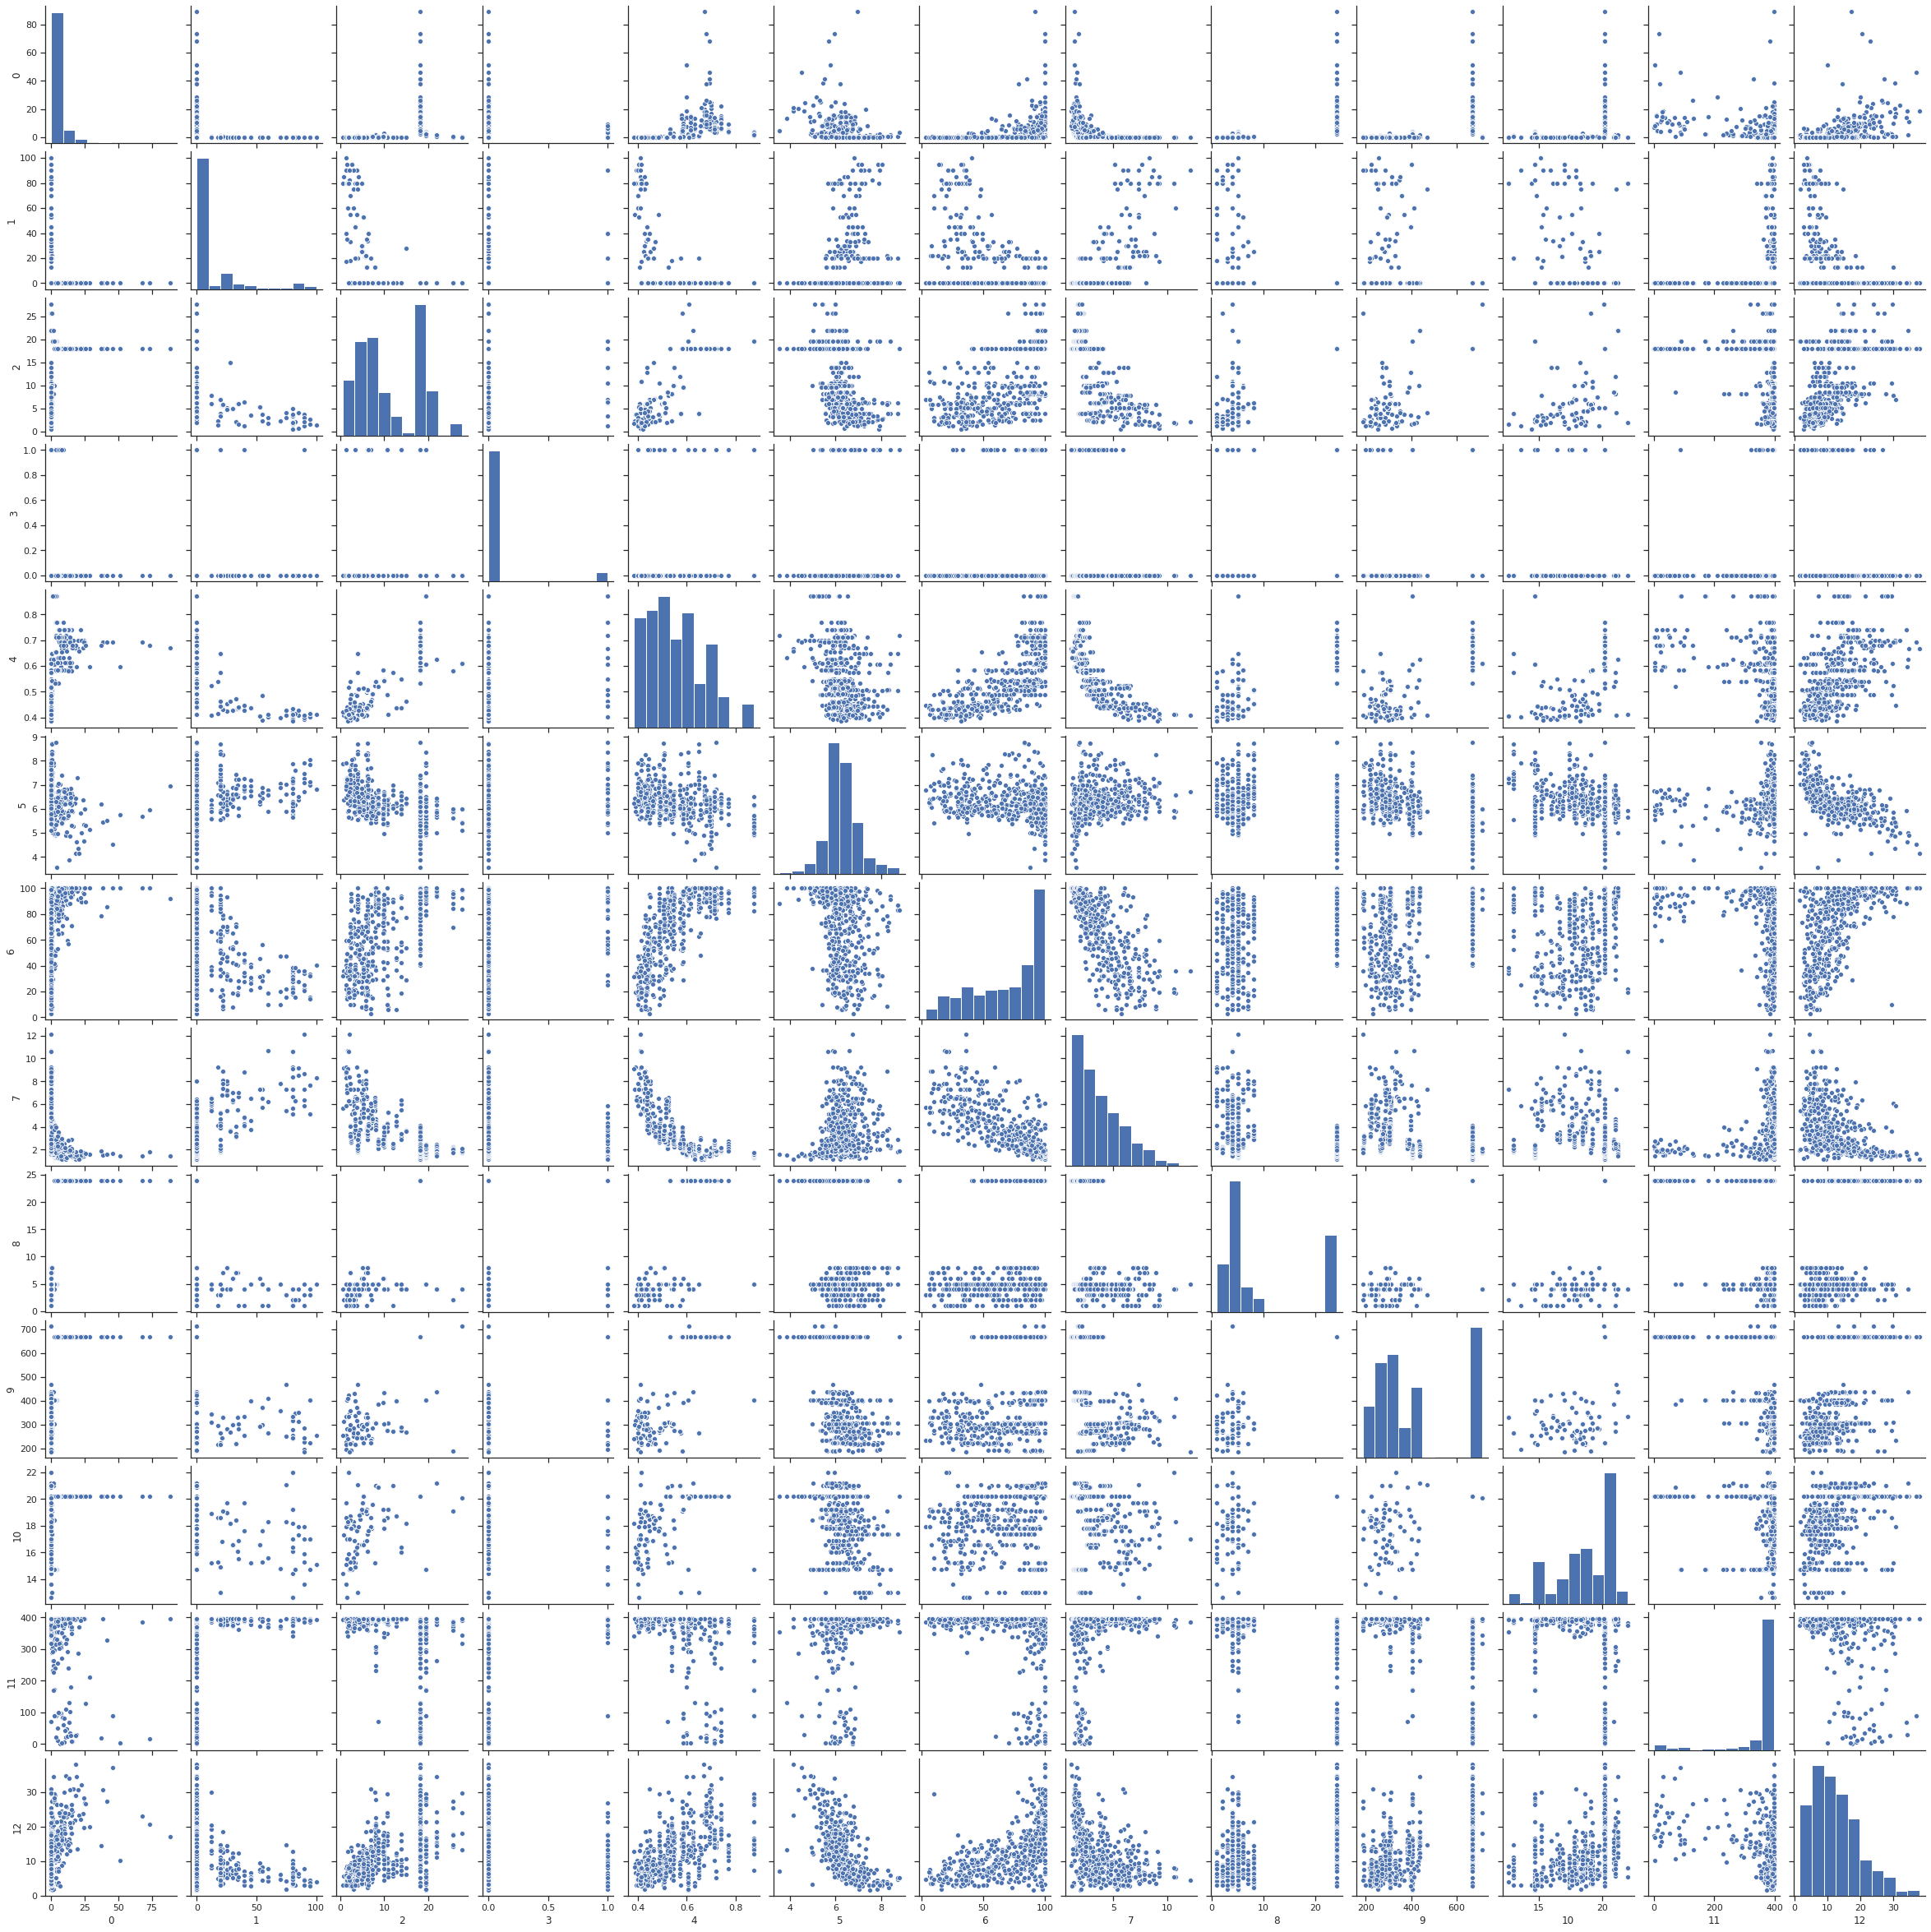

In [7]:
sns.set(style="ticks")
sns.pairplot(data)

## Effect on Models

In [8]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

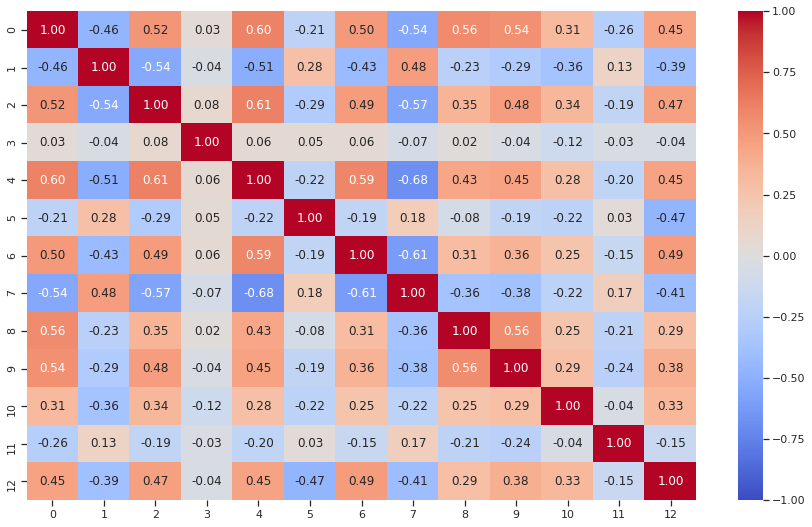

In [9]:
corr = data.corr(method='kendall')
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, annot = True, cmap= 'coolwarm', fmt='.2f',vmin=-1, vmax=1, center= 0)

In [10]:
from sklearn.decomposition import PCA 
obj = PCA(whiten=True)
data_processed = obj.fit_transform(data)

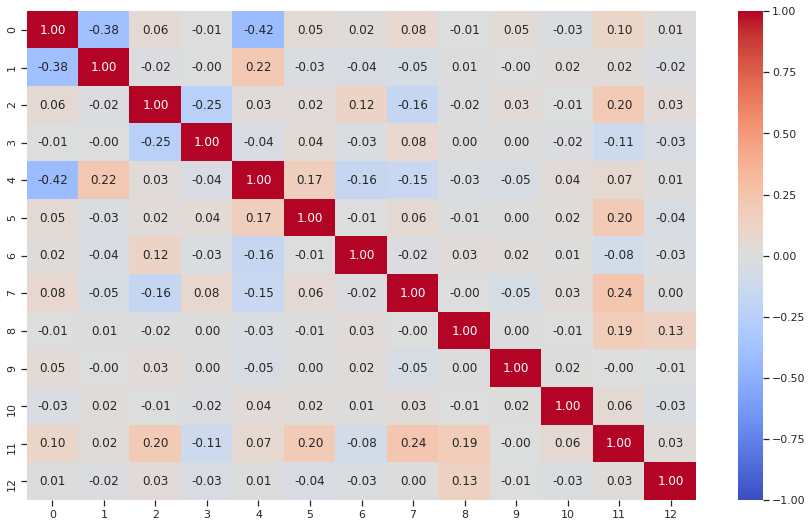

In [11]:
data_processed = pd.DataFrame(data_processed)
corr = data_processed.corr(method='kendall')
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, annot = True, cmap= 'coolwarm', fmt='.2f',vmin=-1, vmax=1, center= 0)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [13]:
X_train_processed, X_test_processed, y_train_processed, y_test_processed = train_test_split(data_processed,
                                                    y,
                                                    test_size=0.2)

X_train_processed.shape, X_test_processed.shape,  y_train_processed.shape, y_test_processed.shape

((404, 13), (102, 13), (404,), (102,))

In [14]:
from sklearn.preprocessing import StandardScaler
obj = StandardScaler()
X_train = obj.fit_transform(X_train)
X_test = obj.transform(X_test)

In [15]:
from sklearn.preprocessing import StandardScaler
obj = StandardScaler()
X_train_processed = obj.fit_transform(X_train_processed)
X_test_processed = obj.transform(X_test_processed)

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.compose import TransformedTargetRegressor

In [17]:
from sklearn.preprocessing import QuantileTransformer

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)

print(mean_squared_error(y_test_processed, y_pred_processed))


29.85892700573236
18.9559646949896


In [19]:
from sklearn.linear_model import RidgeCV
model = RidgeCV()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)

print(mean_squared_error(y_test_processed, y_pred_processed))



27.737015486395915
17.917750001445796


In [20]:
from sklearn.linear_model import Ridge
model = RidgeCV()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)

print(mean_squared_error(y_test_processed, y_pred_processed))



27.737015486395915
17.917750001445796


In [21]:
from sklearn.svm import SVR
model = SVR()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)

print(mean_squared_error(y_test_processed, y_pred_processed))



8.462582708909357
15.046811006418613


In [22]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
print(mean_squared_error(y_test_processed, y_pred_processed))

22.420294759193478
18.37328862948071


In [23]:
from sklearn.svm import LinearSVR
model = LinearSVR()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
print(mean_squared_error(y_test_processed, y_pred_processed))

14.13312340748154
20.13480545178754


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [24]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
print(mean_squared_error(y_test_processed, y_pred_processed))

16.49414298860371
10.754442753425433


In [25]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
print(mean_squared_error(y_test_processed, y_pred_processed))

26.884509803921574
26.958431372549025


In [26]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
print(mean_squared_error(y_test_processed, y_pred_processed))


27.25278526118741
18.92239270689269
